In [1]:
import sys
!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser
!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [2]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options=options)
url = 'https://www.yna.co.kr/theme/mostviewed/index'
driver.get(url)

In [3]:
columns = ['순위', '기사 제목', '기사 작성일']
rank = []
title = []
date = []
##container > div > div.content03 > section > div > ul > li:nth-child(1) > div > div > strong > a > span

for i in range(1, 20):
    rank.append(i)
    title.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div.content03 > section > div > ul > li:nth-child(' + str(i) + ') > div > div > strong > a > span').text)
    date.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div.content03 > section > div > ul > li:nth-child(' + str(i) +') > div > div > span').text)

In [6]:
import pandas as pd
df = pd.DataFrame({columns[0]: rank,
columns[1]: title,
columns[2]: date}, columns=columns)
df

,순위,기사 제목,기사 작성일
0,1,"결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증",2025-03-20 00:09
1,2,아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민,2025-03-20 00:51
2,3,계란 봉변 당한 민주당 백혜련 의원,2025-03-20 01:02
3,4,급격히 늘어난 수도사용량…검침원이 80대 독거노인 생명 구해,2025-03-20 01:57
4,5,토허제 홍역 오세훈 압수수색…서울시 '뒤숭숭'·수사향배 주목(종합),2025-03-20 02:40
5,6,600억대 '개그맨 사칭 리딩방' 사건…1년 만에 수사 중단,2025-03-19 23:40
6,7,로비에 마중 나온 이재용 회장과 인사하는 이재명 대표,2025-03-20 01:48
7,8,[전문] 여야 국민연금 개혁 관련 합의문,2025-03-20 02:57
8,9,"18년 만의 연금개혁…여야, 보험료율 13%·소득대체율 43% 합의(종합)",2025-03-20 03:30
9,10,"""졸음운전 하다 4명 사망""…제주 중앙선 침범사고 운전자 구속",2025-03-20 02:06


In [7]:
df.to_csv('top19_news.csv', index=False)

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,756 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126562 files and dire

In [12]:
import csv
#CSV 파일 읽어오기
f = open('top19_news.csv', 'r')
rdr = csv.reader(f)


title = ''
for line in rdr:
    title = title + ' ' + line[1]
    print(title)

f.close()

 기사 제목
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민 계란 봉변 당한 민주당 백혜련 의원
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민 계란 봉변 당한 민주당 백혜련 의원 급격히 늘어난 수도사용량…검침원이 80대 독거노인 생명 구해
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민 계란 봉변 당한 민주당 백혜련 의원 급격히 늘어난 수도사용량…검침원이 80대 독거노인 생명 구해 토허제 홍역 오세훈 압수수색…서울시 '뒤숭숭'·수사향배 주목(종합)
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민 계란 봉변 당한 민주당 백혜련 의원 급격히 늘어난 수도사용량…검침원이 80대 독거노인 생명 구해 토허제 홍역 오세훈 압수수색…서울시 '뒤숭숭'·수사향배 주목(종합) 600억대 '개그맨 사칭 리딩방' 사건…1년 만에 수사 중단
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민 계란 봉변 당한 민주당 백혜련 의원 급격히 늘어난 수도사용량…검침원이 80대 독거노인 생명 구해 토허제 홍역 오세훈 압수수색…서울시 '뒤숭숭'·수사향배 주목(종합) 600억대 '개그맨 사칭 리딩방' 사건…1년 만에 수사 중단 로비에 마중 나온 이재용 회장과 인사하는 이재명 대표
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 아파트서 여성 차

In [13]:
title = title[6:]
print(title)


 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민 계란 봉변 당한 민주당 백혜련 의원 급격히 늘어난 수도사용량…검침원이 80대 독거노인 생명 구해 토허제 홍역 오세훈 압수수색…서울시 '뒤숭숭'·수사향배 주목(종합) 600억대 '개그맨 사칭 리딩방' 사건…1년 만에 수사 중단 로비에 마중 나온 이재용 회장과 인사하는 이재명 대표 [전문] 여야 국민연금 개혁 관련 합의문 18년 만의 연금개혁…여야, 보험료율 13%·소득대체율 43% 합의(종합) "졸음운전 하다 4명 사망"…제주 중앙선 침범사고 운전자 구속 양재웅 측, 인권위 수사의뢰에 "불복 절차 진행할 것" 검찰, '마약 투약 자수' 래퍼 식케이에 징역 3년6개월 구형 홍천 리조트 기숙사서 다투다 룸메이트 숨지게 한 60대 조사 중 계란 아닌 폭발물이었다면…경찰, 헌재 앞 경비 실패 논란 핀란드, 8년째 '가장 행복한 국가'…韓 58위, 美 역대 최저 24위 중화권서도 '故김새론 교제 논란' 김수현 광고 철회 잇따라 '더 내고 더 받는' 연금개혁 결실…28년 만에 보험료 오른다 '헌재 앞 시위자 강제해산' 상인들 반기면서도 한숨짓는 이유 에어포켓이 살렸다…노르웨이서 눈사태에 묻혔다 7시간만에 생환


In [14]:
!pip install konlpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 28.8 MB/s eta 0:00:00


In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

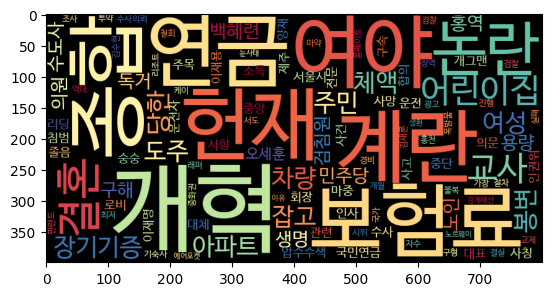

In [16]:
#문자열 분석하기
okt = Okt()
nouns = okt.nouns(title)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)
#워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',\
scale=2.0, colormap='Spectral')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)